In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os,json
sys.path.append(os.path.join("..",".."))

In [3]:
from benchmarks.utils import *
from benchmarks.problem_json import *
from src.models.single_bin_creel.anchor.model import AnchorSBMCreel
from src.models.single_bin_creel.guillotine.model import GuillotineSBMCreel

In [4]:
problems = [
    #(100,100),
    #(200,200),
    #(300,300),
    (100,400), # 1 minute
    # (200,450),
    #(100,900) # 4 minutes
]

[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b

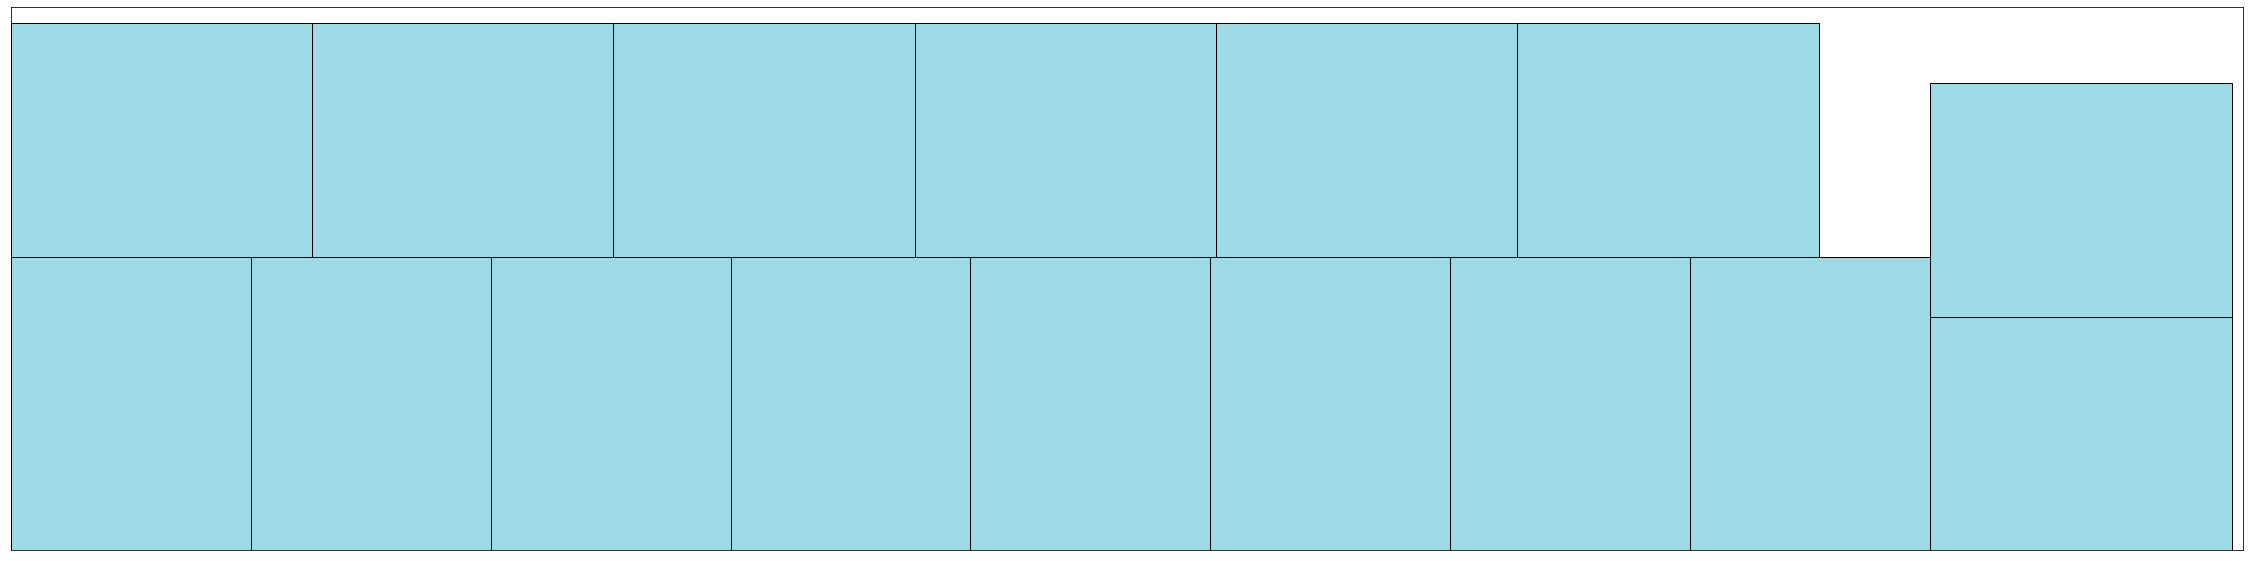

PROBLEM 4_100_400_1
{'widths': [83, 35, 24, 29], 'heights': [53, 27, 46, 37], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV1596, IV1597, IV1598, IV1603, IV1604, IV1605, IV1610, IV1611, IV1612, IV1613, IV1619]
[IV1599, IV1600, IV1601, IV1606, IV1607, IV1608, IV1614, IV1615, IV1616, IV1617, IV1620]
[(IV1596) + (IV1599), (IV1597) + (IV1600), (IV1598) + (IV1601), (IV1603) + (IV1606), (IV1604) + (IV1607), (IV1605) + (IV1608), (IV1610) + (IV1614), (IV1611) + (IV1615), (IV1612) + (IV1616), (IV1613) + (IV1617), (IV1619) + (IV1620)]
[IV1595 > 0, IV1595 > 1, IV1595 > 2, IV1602 > 0, IV1602 > 1, IV1602 > 2, IV1609 > 0, IV1609 > 1, IV1609 > 2, IV1609 > 3, IV1618 > 0]
Transferring...
Solving...
SAT True
TIME 81.16270220000297
{'get_constraints': {'nr_constraint': 18089, 'creation_time': 2.448259799974039}}
STATS {'nr_constraints': 18089, 'transfer_time': 17.374689099844545, 'solve_time': 60.536473099840805, 'density': 0.9384, 'bin_length': 400, 'fulfilled': [0, 

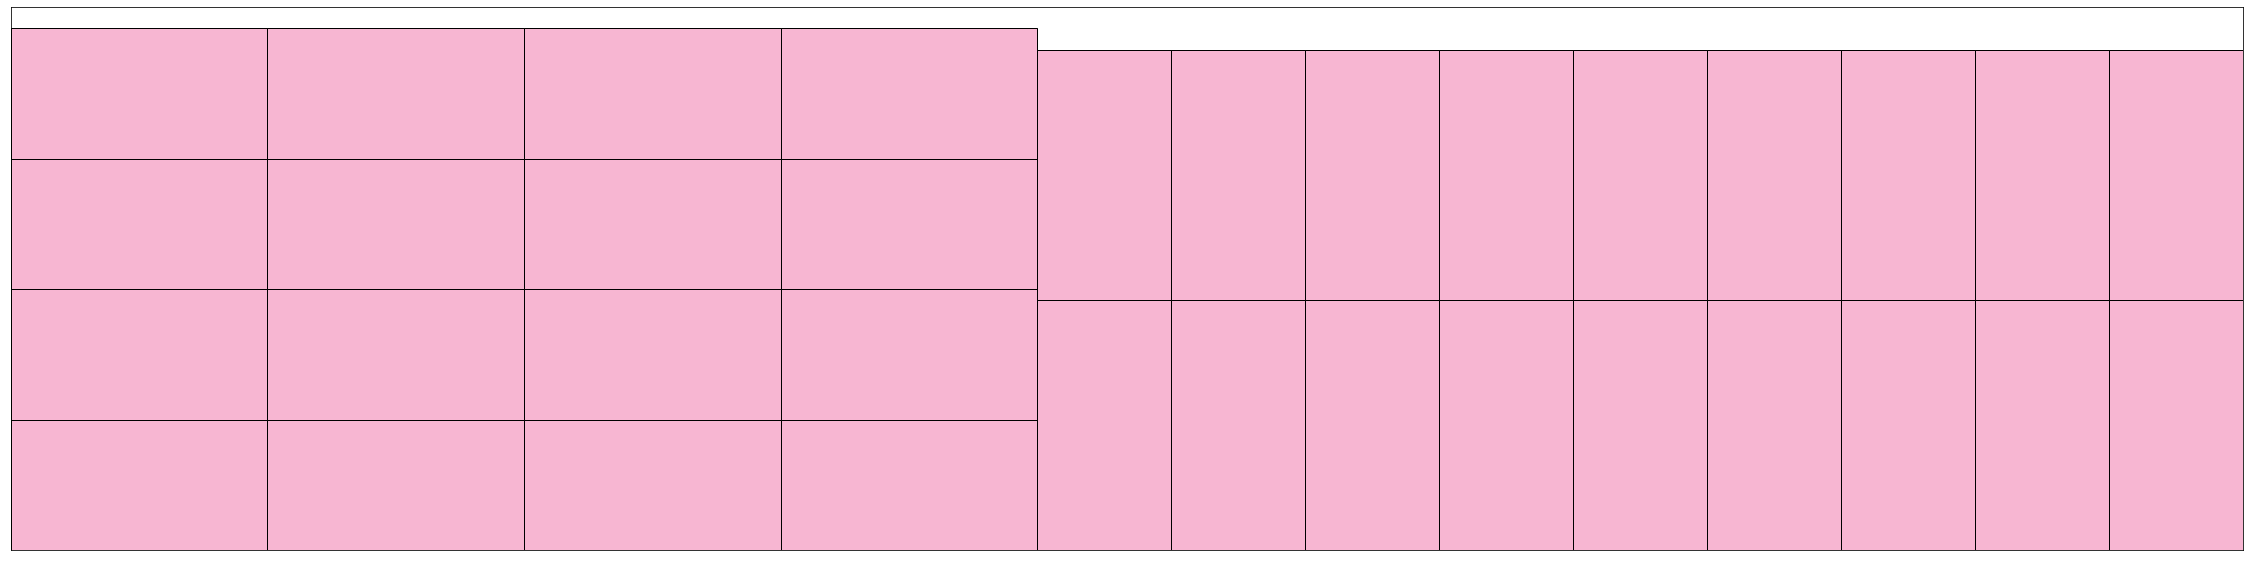

PROBLEM 4_100_400_2
{'widths': [37, 49, 37, 78], 'heights': [24, 28, 63, 57], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV6854, IV6855, IV6856, IV6861, IV6864, IV6865, IV6869, IV6870, IV6871, IV6872]
[IV6857, IV6858, IV6859, IV6862, IV6866, IV6867, IV6873, IV6874, IV6875, IV6876]
[(IV6854) + (IV6857), (IV6855) + (IV6858), (IV6856) + (IV6859), (IV6861) + (IV6862), (IV6864) + (IV6866), (IV6865) + (IV6867), (IV6869) + (IV6873), (IV6870) + (IV6874), (IV6871) + (IV6875), (IV6872) + (IV6876)]
[IV6853 > 0, IV6853 > 1, IV6853 > 2, IV6860 > 0, IV6863 > 0, IV6863 > 1, IV6868 > 0, IV6868 > 1, IV6868 > 2, IV6868 > 3]
Transferring...
Solving...
SAT True
TIME 79.19123809994198
{'get_constraints': {'nr_constraint': 17019, 'creation_time': 2.5761826999951154}}
STATS {'nr_constraints': 17019, 'transfer_time': 15.301946599967778, 'solve_time': 60.62957060011104, 'density': 0.9604, 'bin_length': 400, 'fulfilled': [0, 28, 0, 0], 'counts': [0, 28, 0, 0], 'objective': 

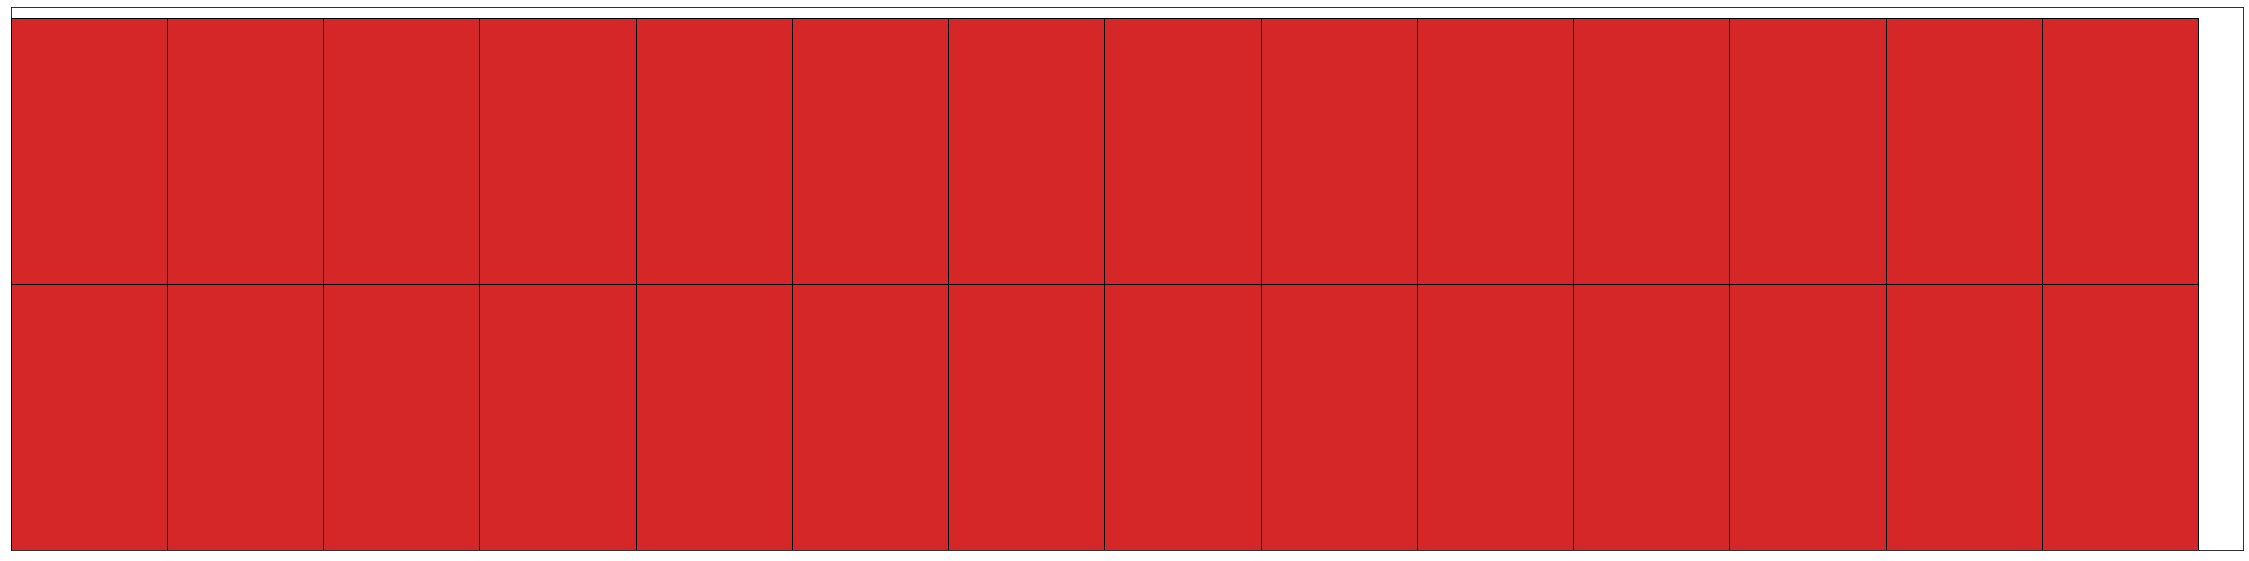

PROBLEM 4_100_400_3
{'widths': [25, 60, 65, 56], 'heights': [41, 35, 38, 54], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV11742, IV11743, IV11747, IV11750, IV11751, IV11755, IV11756, IV11757, IV11758]
[IV11744, IV11745, IV11748, IV11752, IV11753, IV11759, IV11760, IV11761, IV11762]
[(IV11742) + (IV11744), (IV11743) + (IV11745), (IV11747) + (IV11748), (IV11750) + (IV11752), (IV11751) + (IV11753), (IV11755) + (IV11759), (IV11756) + (IV11760), (IV11757) + (IV11761), (IV11758) + (IV11762)]
[IV11741 > 0, IV11741 > 1, IV11746 > 0, IV11749 > 0, IV11749 > 1, IV11754 > 0, IV11754 > 1, IV11754 > 2, IV11754 > 3]
Transferring...
Solving...
SAT True
TIME 77.98353619989939
{'get_constraints': {'nr_constraint': 18087, 'creation_time': 2.1962998998351395}}
STATS {'nr_constraints': 18087, 'transfer_time': 14.641480799997225, 'solve_time': 60.52452139998786, 'density': 0.97375, 'bin_length': 400, 'fulfilled': [38, 0, 0, 0], 'counts': [38, 0, 0, 0], 'objective': 105

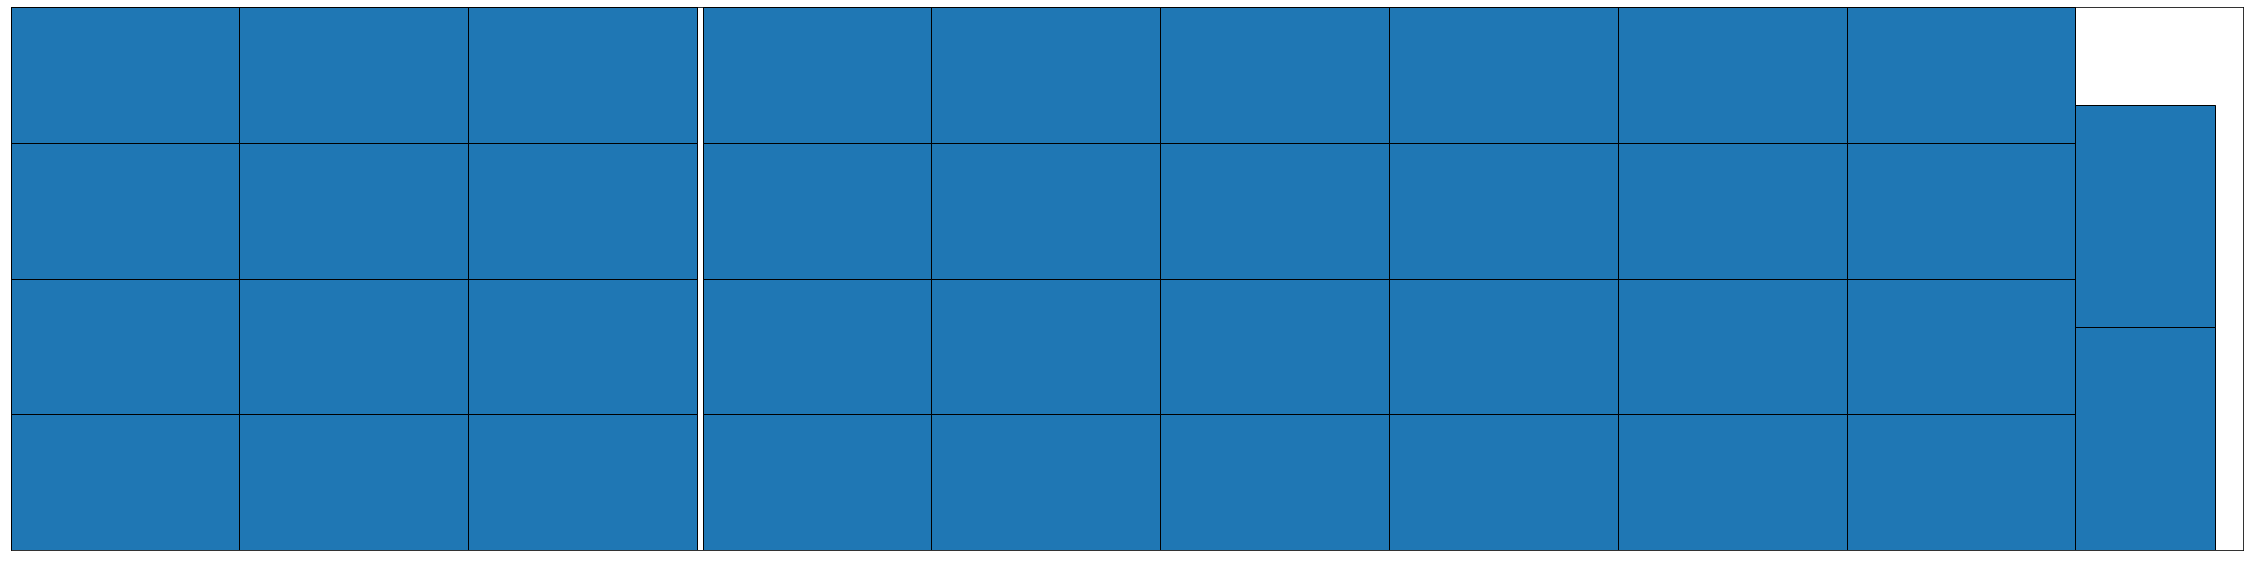

PROBLEM 4_100_400_4
{'widths': [34, 49, 82, 62], 'heights': [35, 72, 36, 62], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV16281, IV16282, IV16286, IV16289, IV16290, IV16294, IV16295]
[IV16283, IV16284, IV16287, IV16291, IV16292, IV16296, IV16297]
[(IV16281) + (IV16283), (IV16282) + (IV16284), (IV16286) + (IV16287), (IV16289) + (IV16291), (IV16290) + (IV16292), (IV16294) + (IV16296), (IV16295) + (IV16297)]
[IV16280 > 0, IV16280 > 1, IV16285 > 0, IV16288 > 0, IV16288 > 1, IV16293 > 0, IV16293 > 1]
Transferring...
Solving...
SAT True
TIME 10.187529700109735
{'get_constraints': {'nr_constraint': 3982, 'creation_time': 0.4428944999817759}}
STATS {'nr_constraints': 3982, 'transfer_time': 2.979166900040582, 'solve_time': 6.59637810010463, 'density': 0.882, 'bin_length': 400, 'fulfilled': [0, 10, 0, 0], 'counts': [0, 10, 0, 0], 'objective': 4720, 'nr_variables': 2112, 'ortools_objective': 4720, 'total_time': 10.187529700109735}


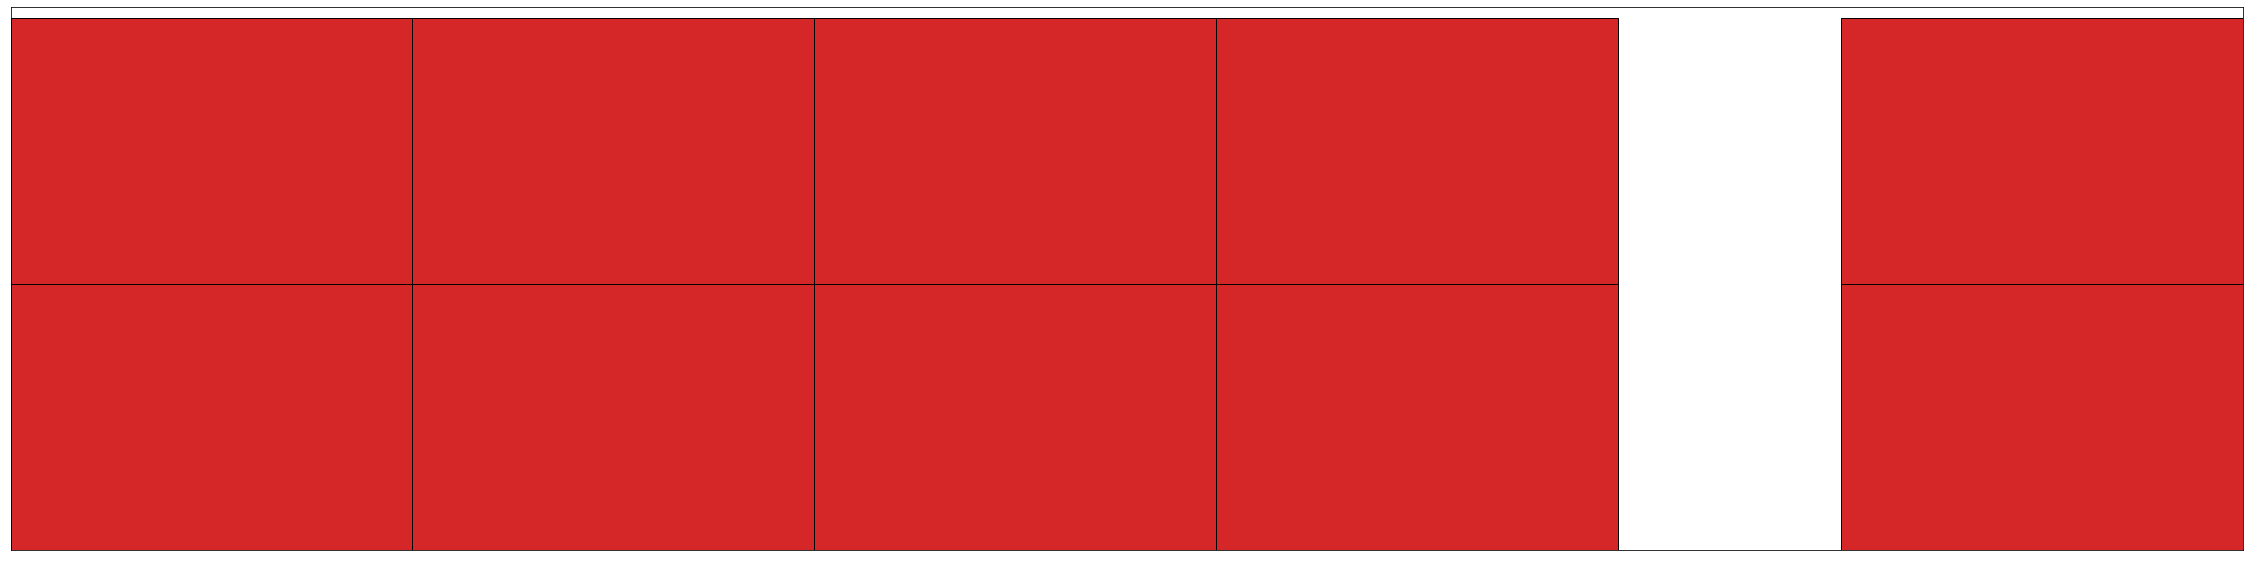

PROBLEM 4_100_400_5
{'widths': [69, 46, 31, 66], 'heights': [71, 63, 45, 61], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV17503, IV17504, IV17508, IV17511, IV17512, IV17513, IV17518]
[IV17505, IV17506, IV17509, IV17514, IV17515, IV17516, IV17519]
[(IV17503) + (IV17505), (IV17504) + (IV17506), (IV17508) + (IV17509), (IV17511) + (IV17514), (IV17512) + (IV17515), (IV17513) + (IV17516), (IV17518) + (IV17519)]
[IV17502 > 0, IV17502 > 1, IV17507 > 0, IV17510 > 0, IV17510 > 1, IV17510 > 2, IV17517 > 0]
Transferring...
Solving...
SAT True
TIME 23.71752670011483
{'get_constraints': {'nr_constraint': 7581, 'creation_time': 1.4210759000852704}}
STATS {'nr_constraints': 7581, 'transfer_time': 5.661962000187486, 'solve_time': 16.329536499921232, 'density': 0.90675, 'bin_length': 400, 'fulfilled': [0, 0, 26, 0], 'counts': [0, 0, 26, 0], 'objective': 3730, 'nr_variables': 3768, 'ortools_objective': 3730, 'total_time': 23.71752670011483}


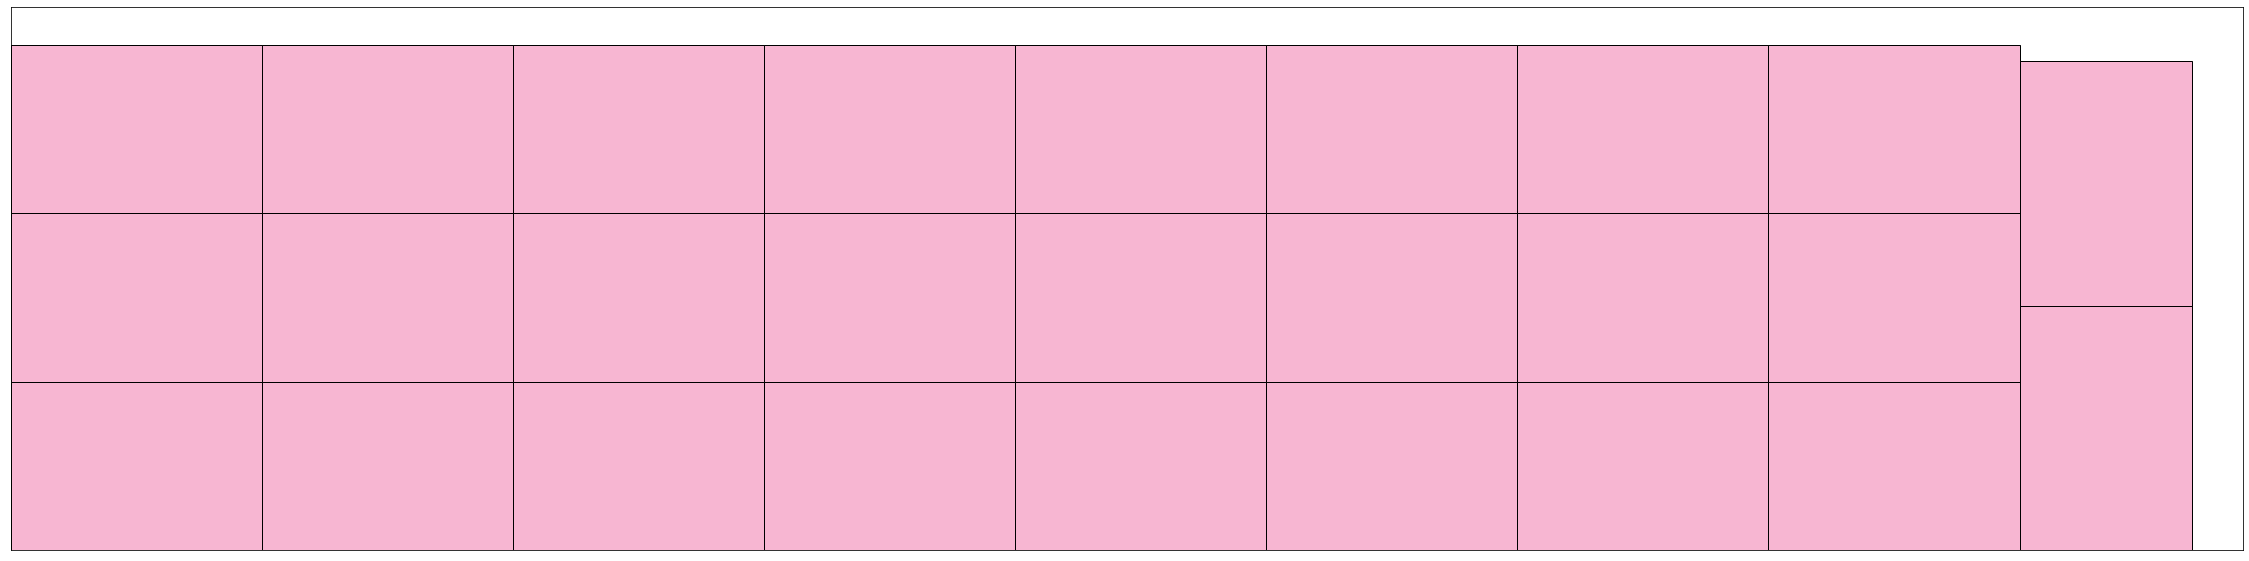

PROBLEM 4_100_400_6
{'widths': [69, 70, 67, 70], 'heights': [65, 69, 47, 31], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV19545, IV19548, IV19549, IV19550, IV19555, IV19556, IV19560]
[IV19546, IV19551, IV19552, IV19553, IV19557, IV19558, IV19561]
[(IV19545) + (IV19546), (IV19548) + (IV19551), (IV19549) + (IV19552), (IV19550) + (IV19553), (IV19555) + (IV19557), (IV19556) + (IV19558), (IV19560) + (IV19561)]
[IV19544 > 0, IV19547 > 0, IV19547 > 1, IV19547 > 2, IV19554 > 0, IV19554 > 1, IV19559 > 0]
Transferring...
Solving...
SAT True
TIME 14.225395700195804
{'get_constraints': {'nr_constraint': 6673, 'creation_time': 1.2903521000407636}}
STATS {'nr_constraints': 6673, 'transfer_time': 5.991690600058064, 'solve_time': 6.606162599986419, 'density': 0.868, 'bin_length': 400, 'fulfilled': [0, 0, 0, 16], 'counts': [0, 0, 0, 16], 'objective': 5280, 'nr_variables': 3696, 'ortools_objective': 5280, 'total_time': 14.225395700195804}


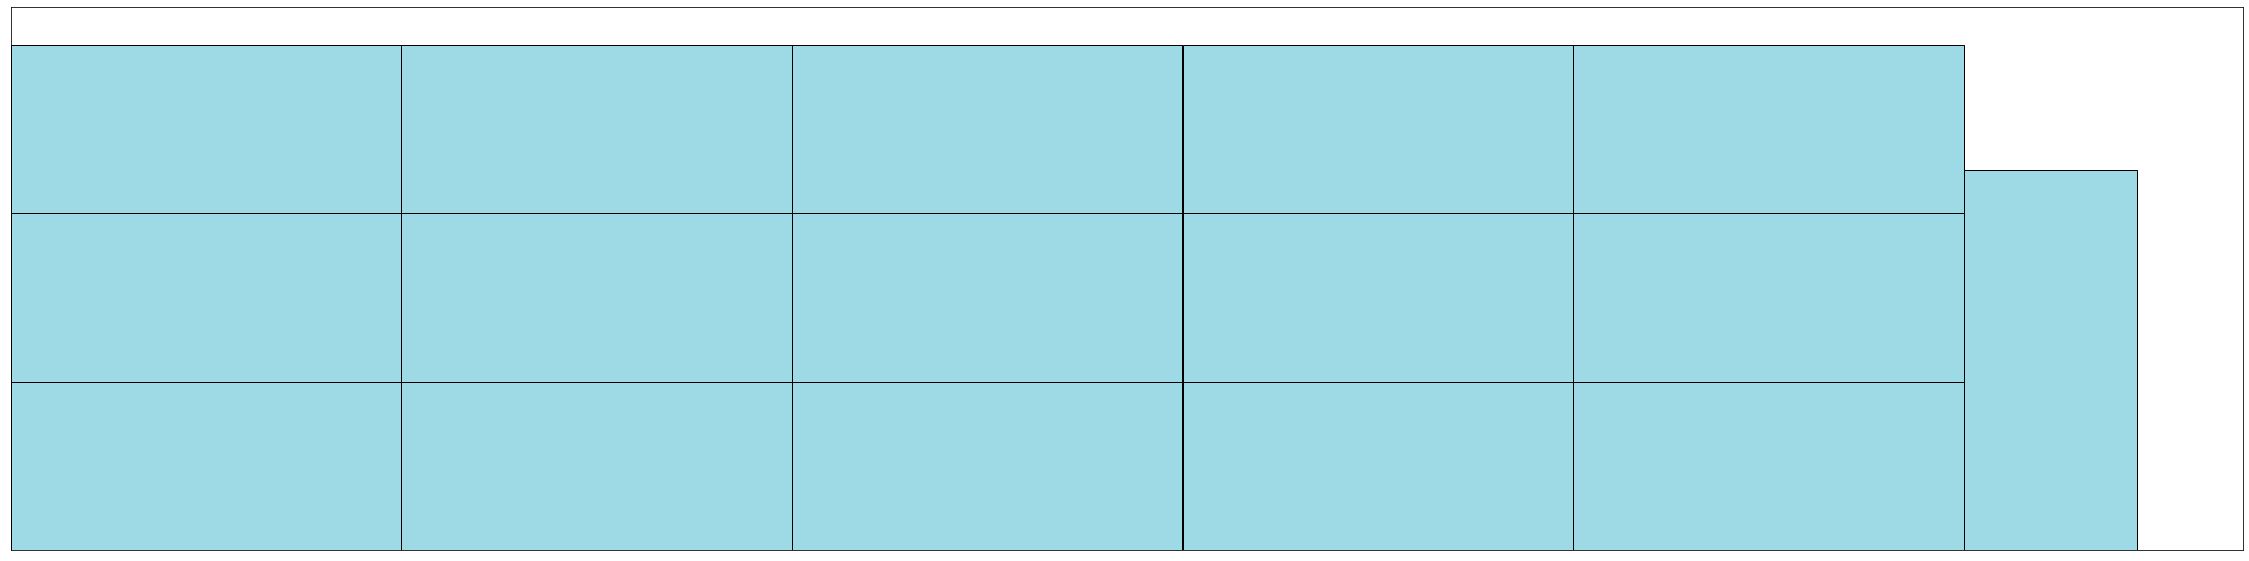

PROBLEM 4_100_400_7
{'widths': [83, 47, 20, 88], 'heights': [50, 28, 43, 40], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV21781, IV21782, IV21783, IV21788, IV21789, IV21793, IV21794, IV21795, IV21796, IV21797, IV21804, IV21805]
[IV21784, IV21785, IV21786, IV21790, IV21791, IV21798, IV21799, IV21800, IV21801, IV21802, IV21806, IV21807]
[(IV21781) + (IV21784), (IV21782) + (IV21785), (IV21783) + (IV21786), (IV21788) + (IV21790), (IV21789) + (IV21791), (IV21793) + (IV21798), (IV21794) + (IV21799), (IV21795) + (IV21800), (IV21796) + (IV21801), (IV21797) + (IV21802), (IV21804) + (IV21806), (IV21805) + (IV21807)]
[IV21780 > 0, IV21780 > 1, IV21780 > 2, IV21787 > 0, IV21787 > 1, IV21792 > 0, IV21792 > 1, IV21792 > 2, IV21792 > 3, IV21792 > 4, IV21803 > 0, IV21803 > 1]
Transferring...
Solving...
SAT False
TIME 97.30125730019063
{'get_constraints': {'nr_constraint': 35466, 'creation_time': 4.432287700008601}}
PROBLEM 4_100_400_8
{'widths': [74, 55, 25, 66],

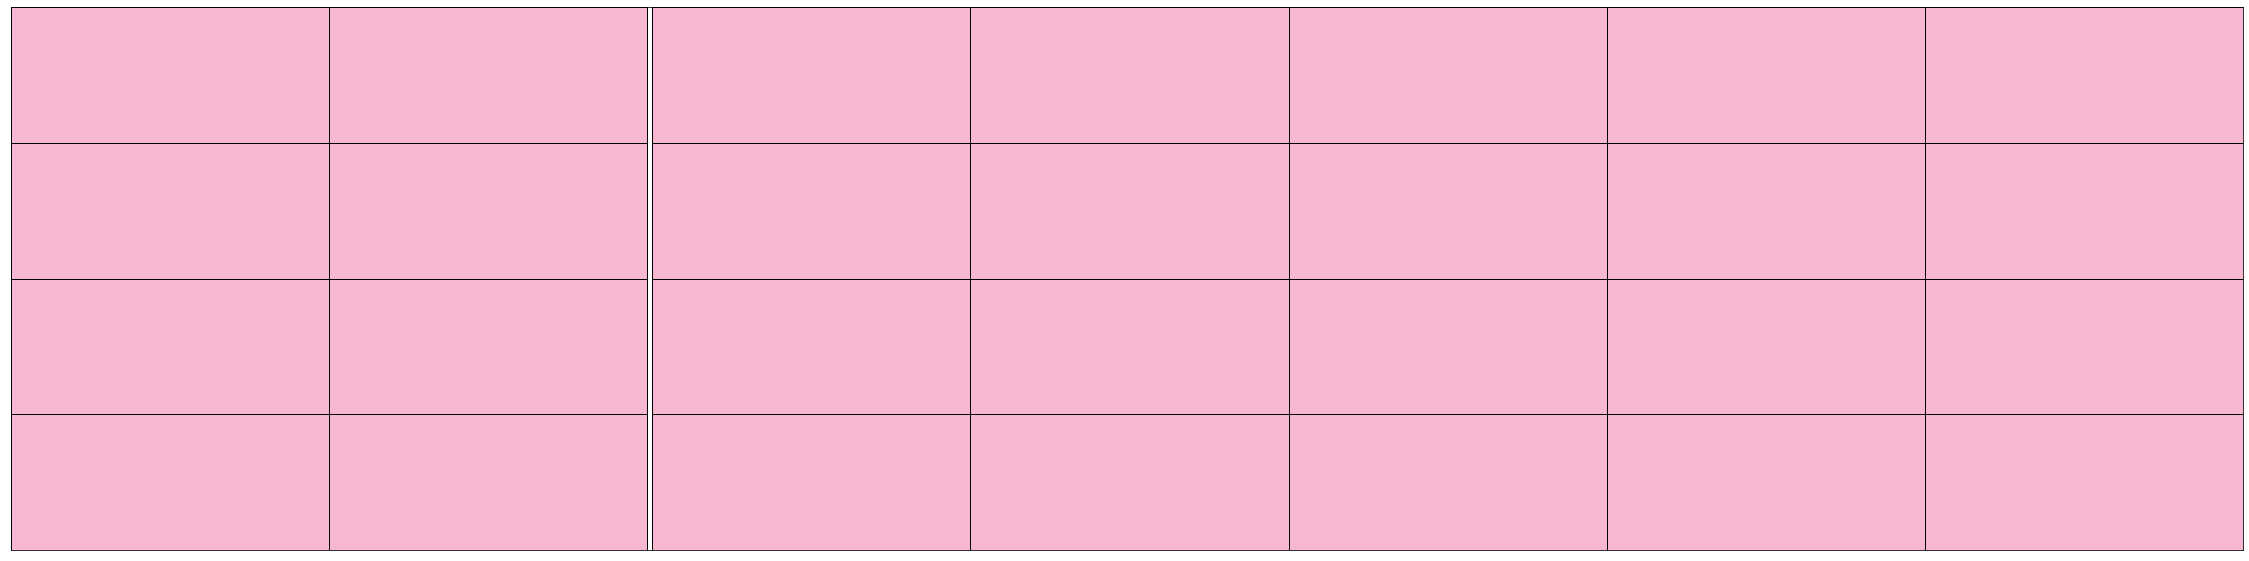

PROBLEM 4_100_400_9
{'widths': [45, 95, 36, 63], 'heights': [94, 50, 34, 49], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
heyyyyy
[IV35366, IV35367, IV35371, IV35372, IV35376, IV35377, IV35381, IV35382]
[IV35368, IV35369, IV35373, IV35374, IV35378, IV35379, IV35383, IV35384]
[(IV35366) + (IV35368), (IV35367) + (IV35369), (IV35371) + (IV35373), (IV35372) + (IV35374), (IV35376) + (IV35378), (IV35377) + (IV35379), (IV35381) + (IV35383), (IV35382) + (IV35384)]
[IV35365 > 0, IV35365 > 1, IV35370 > 0, IV35370 > 1, IV35375 > 0, IV35375 > 1, IV35380 > 0, IV35380 > 1]
Transferring...
Solving...
SAT True
TIME 12.360517899971455
{'get_constraints': {'nr_constraint': 4235, 'creation_time': 0.6463707000948489}}
STATS {'nr_constraints': 4235, 'transfer_time': 3.601259700022638, 'solve_time': 6.8250186000950634, 'density': 0.95, 'bin_length': 400, 'fulfilled': [0, 8, 0, 0], 'counts': [0, 8, 0, 0], 'objective': 2000, 'nr_variables': 2134, 'ortools_objective': 2000, 'total_t

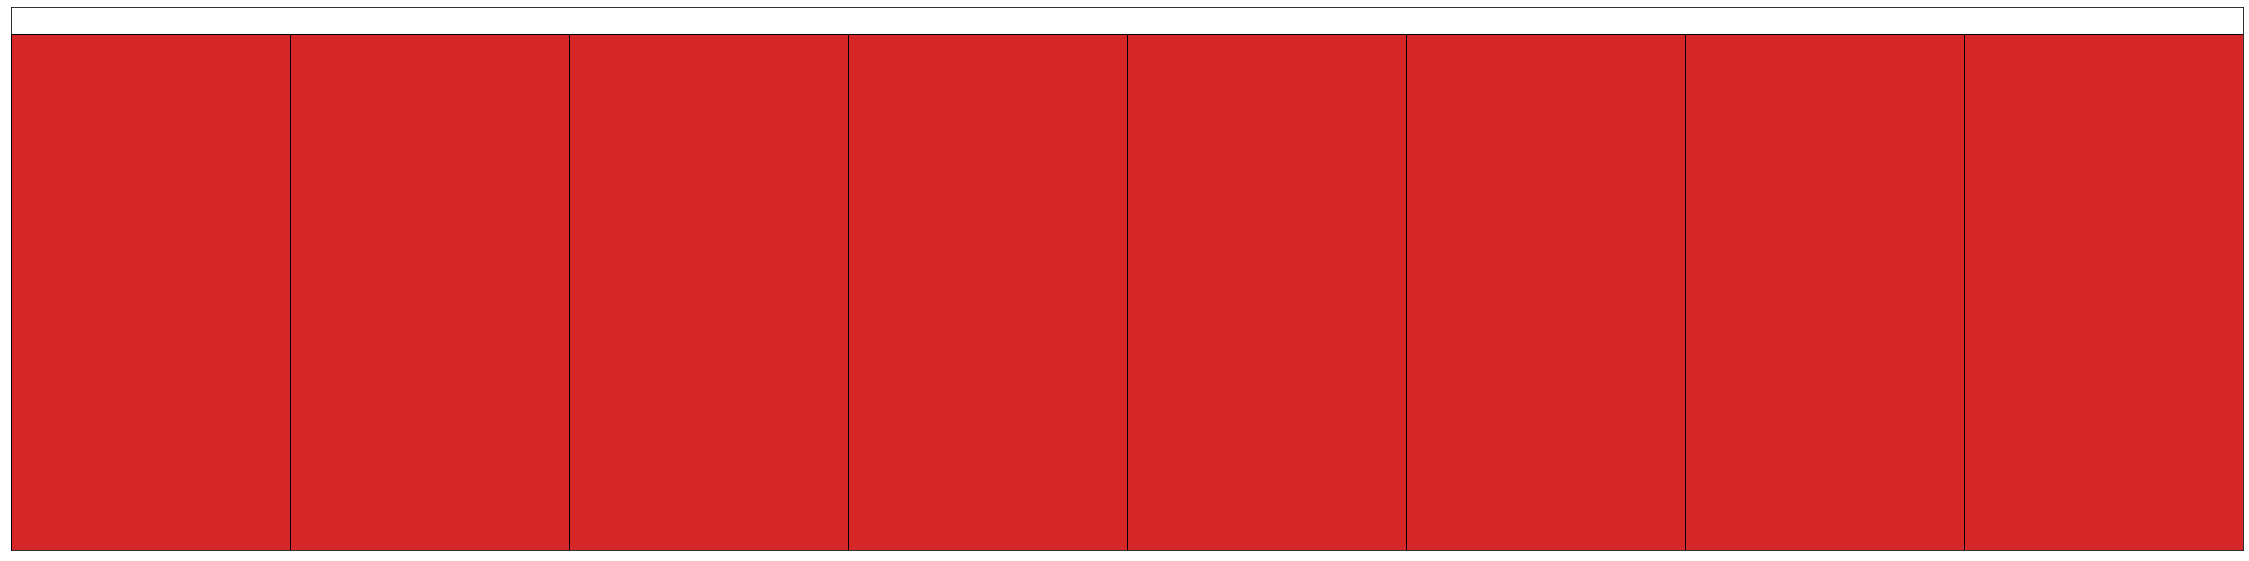

In [5]:
nr_item_types = [4]

for minutes in [1]:
    for nr_item_type in nr_item_types:
        for problem in problems:

            x, y = problem
            #for x in range(1,y+1):
            file_name = str(nr_item_type) + "_" + str(x) + "_" + str(y) 

            f = open(os.path.join(os.getcwd(), "problems", file_name + ".json"))
            data = json.load(f)

            run_single_bin_benchmark_repeated([GuillotineSBMCreel], (ProblemJsonCS.init_from_file(data)), max_time_seconds=60*minutes, nr_repeats=1)